In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=20, centers=15, cluster_std=2.0, shuffle=True, random_state=0)
variables = ['辛さ','重厚','スパイシー','果実味','コク','酸味','落ち着き','香り','華やか','ジューシー','熟成','透明感','シャープ','力強い',
             'フレッシュ','渋み','苦味','樽','エキゾチック','粘性']

name = list(map(str,[i for i in range(100)]))
df = pd.DataFrame(X, columns=variables,index=name)

In [2]:
df

,辛さ,重厚,スパイシー,果実味,コク,酸味,落ち着き,香り,華やか,ジューシー,熟成,透明感,シャープ,力強い,フレッシュ,渋み,苦味,樽,エキゾチック,粘性
0,-6.867455,-5.634108,-0.881840,-6.482588,-7.159777,-6.394668,2.528458,-9.883541,7.197917,-7.291906,7.651226,1.407066,12.381189,2.889084,3.602466,-6.967406,-2.833069,-5.861254,-5.390123,-13.294555
1,8.591997,-2.939312,-2.795689,8.441495,8.202073,5.035962,-9.551829,11.863202,1.391670,6.811569,-5.089919,7.814202,-7.849138,0.114050,-2.882001,7.194346,7.214782,2.017785,-0.986718,-7.536471
2,0.246883,4.617195,3.212311,1.596973,-3.055192,0.042299,1.480808,6.456562,7.968668,-3.373548,2.148362,-0.378050,0.401580,9.752649,-7.182365,-8.249872,-7.731935,7.332327,5.531771,7.722099
3,5.007082,2.136003,11.041768,2.046806,-2.076545,4.375675,-9.963064,-4.988563,5.988508,-2.123277,2.397892,-2.612181,-11.314279,-2.854946,-0.393441,-2.108009,4.656146,4.359952,0.764049,-3.800434
4,-4.010045,4.244966,6.905713,-5.643761,6.686582,0.799046,-0.418340,2.750262,0.286303,-1.123998,-2.514172,-6.296712,-8.434826,8.658997,4.817495,-0.434714,-4.773589,-6.092134,-10.631048,-0.215011
5,11.458459,0.503817,-1.909037,6.150392,-8.568203,-0.035392,-5.395007,9.447122,-1.505243,-1.077127,-3.065716,5.495259,0.724136,1.525199,-10.414662,0.033869,2.070053,2.727266,10.626627,3.406191
6,-0.653447,-6.377730,6.315381,-10.059298,3.663191,3.605400,-3.907413,-7.956664,-5.047485,-0.130093,-3.324412,-1.187301,7.071626,-9.482251,-1.799952,-6.863000,3.452306,-8.497294,-2.131874,-4.718373
7,-6.133775,-5.448214,-13.063670,10.050953,-0.316636,6.468255,-6.139207,3.484811,-8.547990,0.207965,7.513344,6.220965,-2.822386,10.398543,0.492225,9.432093,10.779629,2.870184,-0.050825,6.774770
8,4.909424,-2.865518,6.103814,8.303592,7.671129,12.401938,-8.685472,1.780495,7.800347,-6.945076,-0.403811,-9.720159,-9.660127,-11.021234,6.367486,-2.469591,-4.638510,10.325739,1.583101,-10.535861
9,8.385367,-8.989615,0.226857,-8.780719,5.776530,-2.575645,-0.153321,-9.617810,-6.551712,-1.655644,-2.919304,7.825179,7.214884,6.061562,8.968819,-9.563794,1.976429,5.119185,7.574356,-3.812371


name   , 

In [3]:
X.shape

(100, 20)

In [4]:
y.shape

(100,)

In [5]:
%matplotlib.inline
import matplotlib.pyplot as plt

ERROR:root:Line magic function `%matplotlib.inline` not found.


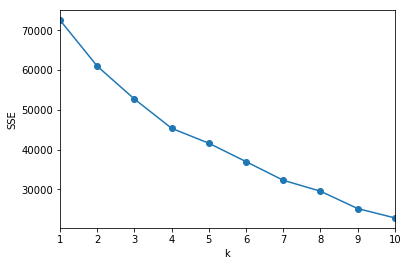

In [6]:
from sklearn.cluster import KMeans

SSE = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    SSE.append(km.inertia_)

plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('k')
plt.ylabel('SSE')
plt.xlim(1,10)
plt.show()

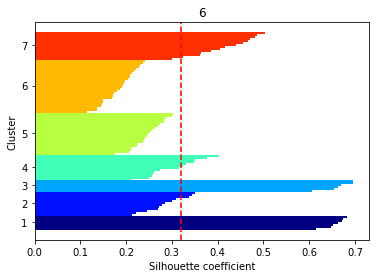

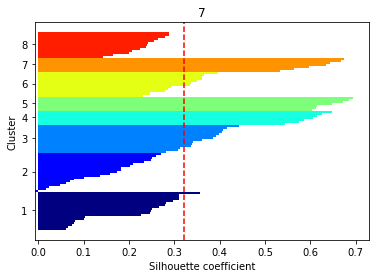

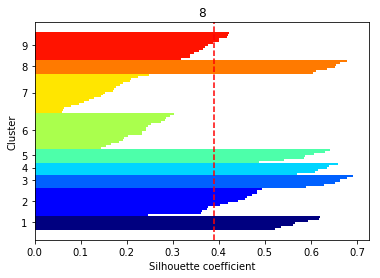

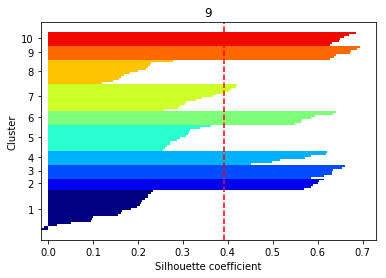

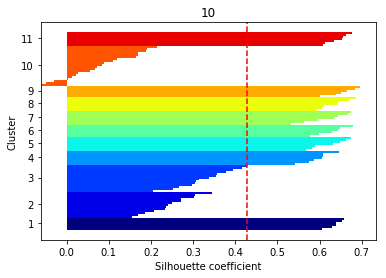

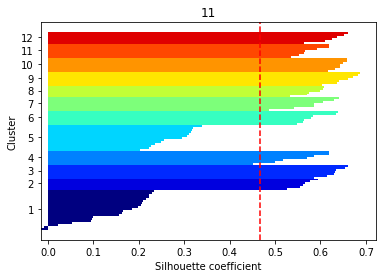

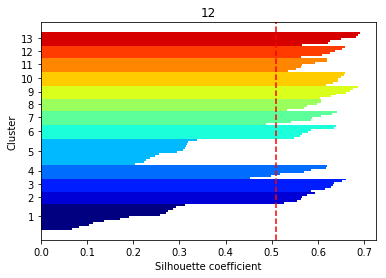

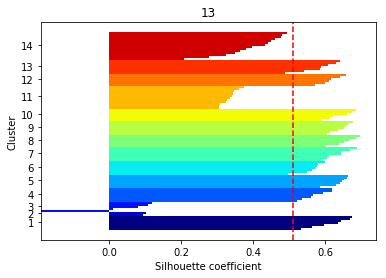

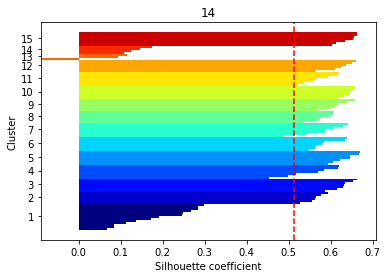

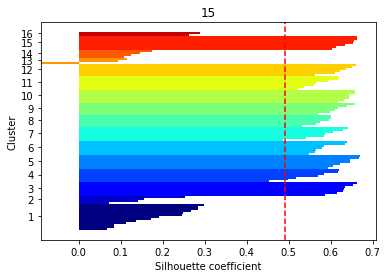

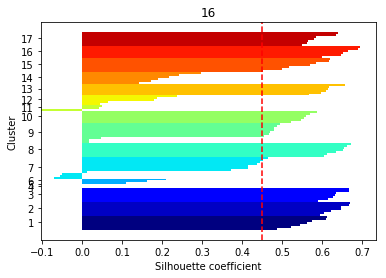

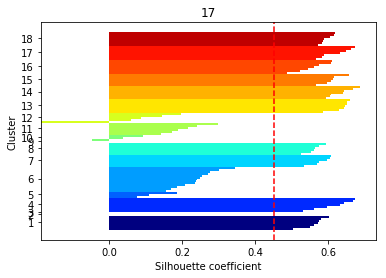

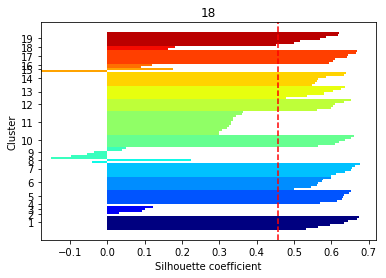

In [7]:
clusters = [7,8,9,10,11,12,13,14,15,16,17,18,19]

for i in clusters:

    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples
    import numpy as np
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.title(i)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

In [10]:
df

,辛さ,重厚,スパイシー,果実味,コク,酸味,落ち着き,香り,華やか,ジューシー,熟成,透明感,シャープ,力強い,フレッシュ,渋み,苦味,樽,エキゾチック,粘性
0,-6.867455,-5.634108,-0.881840,-6.482588,-7.159777,-6.394668,2.528458,-9.883541,7.197917,-7.291906,7.651226,1.407066,12.381189,2.889084,3.602466,-6.967406,-2.833069,-5.861254,-5.390123,-13.294555
1,8.591997,-2.939312,-2.795689,8.441495,8.202073,5.035962,-9.551829,11.863202,1.391670,6.811569,-5.089919,7.814202,-7.849138,0.114050,-2.882001,7.194346,7.214782,2.017785,-0.986718,-7.536471
2,0.246883,4.617195,3.212311,1.596973,-3.055192,0.042299,1.480808,6.456562,7.968668,-3.373548,2.148362,-0.378050,0.401580,9.752649,-7.182365,-8.249872,-7.731935,7.332327,5.531771,7.722099
3,5.007082,2.136003,11.041768,2.046806,-2.076545,4.375675,-9.963064,-4.988563,5.988508,-2.123277,2.397892,-2.612181,-11.314279,-2.854946,-0.393441,-2.108009,4.656146,4.359952,0.764049,-3.800434
4,-4.010045,4.244966,6.905713,-5.643761,6.686582,0.799046,-0.418340,2.750262,0.286303,-1.123998,-2.514172,-6.296712,-8.434826,8.658997,4.817495,-0.434714,-4.773589,-6.092134,-10.631048,-0.215011
5,11.458459,0.503817,-1.909037,6.150392,-8.568203,-0.035392,-5.395007,9.447122,-1.505243,-1.077127,-3.065716,5.495259,0.724136,1.525199,-10.414662,0.033869,2.070053,2.727266,10.626627,3.406191
6,-0.653447,-6.377730,6.315381,-10.059298,3.663191,3.605400,-3.907413,-7.956664,-5.047485,-0.130093,-3.324412,-1.187301,7.071626,-9.482251,-1.799952,-6.863000,3.452306,-8.497294,-2.131874,-4.718373
7,-6.133775,-5.448214,-13.063670,10.050953,-0.316636,6.468255,-6.139207,3.484811,-8.547990,0.207965,7.513344,6.220965,-2.822386,10.398543,0.492225,9.432093,10.779629,2.870184,-0.050825,6.774770
8,4.909424,-2.865518,6.103814,8.303592,7.671129,12.401938,-8.685472,1.780495,7.800347,-6.945076,-0.403811,-9.720159,-9.660127,-11.021234,6.367486,-2.469591,-4.638510,10.325739,1.583101,-10.535861
9,8.385367,-8.989615,0.226857,-8.780719,5.776530,-2.575645,-0.153321,-9.617810,-6.551712,-1.655644,-2.919304,7.825179,7.214884,6.061562,8.968819,-9.563794,1.976429,5.119185,7.574356,-3.812371


### サンプル間の距離を求める

In [13]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),columns=name, index=name)
print(row_dist)

            0          1          2          3          4          5  \
0    0.000000  52.624242  41.002106  41.625637  39.249034  47.701933   
1   52.624242   0.000000  41.518133  32.704102  38.814321  30.022858   
2   41.002106  41.518133   0.000000  32.868977  33.399859  27.233159   
3   41.625637  32.704102  32.868977   0.000000  31.392470  33.169500   
4   39.249034  38.814321  33.399859  31.392470   0.000000  43.270015   
5   47.701933  30.022858  27.233159  33.169500  43.270015   0.000000   
6   32.179620  42.322500  42.507352  33.098625  34.126482  41.115787   
7   49.747503  34.028919  41.581994  42.137292  42.763238  35.980141   
8   49.666381  36.617068  41.808531  25.761110  39.462839  43.620806   
9   35.879622  43.626511  39.744987  38.883694  40.779959  39.486565   
10  50.838865  31.601004  26.357573  32.980938  41.791916  10.787777   
11  47.315310  33.713137  39.040665  34.561621  44.266361  30.931352   
12  47.588165  31.706927  25.667231  32.767814  41.475880  12.23

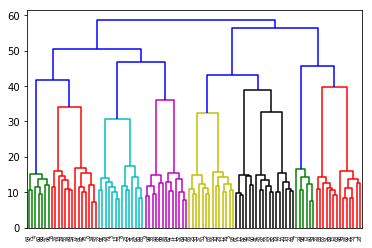

In [14]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
row_dender = dendrogram(row_clusters, labels=name)
plt.show()

__エルボー法とシルエット分析と樹状図（dendrogram）を駆使して得られた結果によるとクラスタ数は７が最適かと思われる。__   
__そのため新規出店のワインショップには、７種の特徴の異なるワインを揃えるのがバランスの良い品揃えであると言える。__  
__※樹状図は縦軸３.９ぐらいで切ると７つの樹状図が出来上がる__

In [15]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=7,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_km = km.fit_predict(X)

In [16]:
y_km

array([0, 2, 4, 5, 4, 3, 0, 2, 5, 0, 3, 3, 3, 5, 6, 1, 3, 1, 0, 6, 6, 2, 5,
       5, 2, 4, 2, 6, 3, 5, 4, 5, 3, 5, 0, 1, 0, 4, 0, 2, 2, 6, 0, 0, 0, 6,
       2, 4, 0, 6, 4, 1, 5, 6, 0, 0, 3, 6, 2, 2, 4, 1, 3, 1, 4, 1, 2, 5, 4,
       3, 3, 3, 0, 2, 0, 4, 1, 6, 0, 5, 5, 0, 6, 5, 3, 4, 4, 1, 1, 1, 1, 5,
       0, 3, 0, 1, 4, 6, 2, 0], dtype=int32)

In [17]:
y

array([ 3,  7,  0,  6,  9,  1,  2, 13,  8, 12,  1,  5,  1,  6, 10,  4,  1,
       11,  2, 10, 10,  7,  6,  8, 13,  0,  7, 10,  1,  6,  0,  8,  5,  6,
        3,  4,  2,  0, 12,  7, 13, 14,  3,  3, 12, 14,  7,  9,  2, 10,  0,
        4,  8, 14,  2,  2,  1, 14,  7, 13,  9, 11,  5,  4,  9,  4,  7,  8,
        9,  5,  5,  5,  3, 13,  2,  9, 11, 10,  3,  6,  8,  3, 14,  8,  5,
        0,  0, 11,  4,  4, 11,  6, 12,  1, 12, 11,  9, 14, 13, 12])